In [1]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 1. Data Preparation

In [0]:
max_item_id = 10000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Source file: User_items.json 

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
 'item_name': 'Counter-Strike',
 'playtime_forever': 6,
 'playtime_2weeks': 0},
 {'item_id': '20',
 'item_name': 'Team Fortress Classic',
 'playtime_forever': 0,
 'playtime_2weeks': 0},}
 
 
 We reorganize it as a user_item matrix. This is the main input layer.

In [0]:
# import json
# import pandas as pd
# import ast
# import numpy as np
# from collections import OrderedDict
# from sklearn.preprocessing import MinMaxScaler

# filepath = './user_items.json'
# writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'

# data = []
# game_ids_valid = set()	# We only want to have game ids that appear in any user's game list

# num_games_considered = 0 # Just for profiling
# num_valid_users = 0		# Also profiling

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:		
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <=  max_item_id: 		# Set limit on games due to space
# 						games_filter.append({game_id: playtime})
# 						game_ids_valid.add(game_id)
# 						num_games_considered += 1

# 			if len(games_filter) >= 1:		
# 				num_valid_users += 1	
# 				data.append({l["user_id"]: games_filter})
        
# 		#count = count+1
# 		#print(count)

        

# print(max_item_id)
# print(num_games_considered)
# print(len(game_ids_valid))
# print(num_valid_users)

In [0]:
# # Now with format as data (list of nested JSON objects) = 	[	{user_id: [	{item_id: playtime_forever}		]	}	]
# # Convert to dataframe where
# #		item_id		0		..		max_item_id		
# #  user_id 			
# #	x1				playtime_forever
# #	...
# #	xn
# #
# # 
# # Create list of game_id's only based on the valid game ids
# game_list = list(game_ids_valid)
# game_list = sorted(game_list)
# print(*game_list)
# games_dict = OrderedDict()

# df = pd.DataFrame(columns = list(game_list))
# items_list = np.zeros(len(game_list))


# for user in data:
	
# 	# Clear entries of sorted Dictionary (and creates the first set of key-value pairs)
# 	for k in game_list:	
# 		games_dict[k] = 0

# 	key = next(iter(user))	# Note there's only one key. User is {user_id: [...]}
# 	df.loc[key] = 0
# 	items = user[key]
# 	for i in items:
# 		[(k, v)] = i.items()
# 		games_dict[k] = v

# 	# Make the list based on the sorted values in dict
# 	val = list(games_dict.values())
# 	for i in range(len(game_list)):
# 		df.loc[key][game_list[i]] = val[i]

# df.to_csv(writefilepath, index=False)

In [5]:
writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'
df_matrix = pd.read_csv(writefilepath,engine='python')
print(df_matrix.shape)
df_matrix.head()

(61244, 354)


,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,6,0,7,0,0,0,0,0,0,0,696,1853,0,4733,0,37,0,168,173,323,513,1474,887,23532,0,0,0,10006,0,0,0,0,0,0,0,0,0,0,0,0,...,0,10345,0,3061,0,0,0,0,0,0,0,0,0,653,0,692,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,750,62,0,220,0,21,0,181,169,295,0,83,3464,265,0,0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,...,0,748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,224,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1323,0,0,0,0,90,0,234,113,507,0,82,1485,1569,0,923,0,1646,0,0,0,0,0,0,158,0,0,0,0,0,...,0,0,0,9202,0,616,0,0,32,0,0,0,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,92,2304,0,67,0,0,0,0,1234,119,103,330,5138,4167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,19,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93,89,16,4,178,0,108,13,47,313,89,164,0,1131,187,19,0,491,167,233,0,9216,802,19800,0,0,0,3546,0,18,0,4,1,0,19,0,0,0,0,0,...,0,2699,0,4076,0,25,0,0,9,0,0,0,0,970,0,1211,0,0,0,0,0,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
##scale matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaled_values = scaler.fit_transform(df_matrix)
df_scaled_matrix = pd.DataFrame(scaled_values)
#df.loc[:,:] = scaled_values


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
df_scaled_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353
0,0.000168,0.000000,0.000478,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.132304,0.038675,0.0,0.250184,0.000000,0.090509,0.0,0.066643,0.085605,0.127577,0.027028,0.042998,0.075009,0.625407,0.0,0.000000,0.0,0.272723,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.243162,0.0,0.323265,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.569361,0.0,0.104168,0.0,0.0,0.0,0.0,0.0,0.000000,0.043447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142569,0.001294,0.0,0.011629,0.000000,0.051370,0.0,0.071800,0.083626,0.116518,0.000000,0.002421,0.292931,0.007043,0.0,0.000000,0.0,0.011666,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017582,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397022,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.251492,0.000000,0.0,0.000000,0.000000,0.220157,0.0,0.092824,0.055916,0.200253,0.000000,0.002392,0.125578,0.041699,0.0,0.411319,0.0,0.044863,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.125437,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.971803,0.0,1.536160,0.0,0.0,0.057637,0.0,0.0,0.0,1.530899,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.017488,0.048088,0.0,0.003542,0.000000,0.000000,0.0,0.000000,0.610619,0.047002,0.005427,0.009626,0.434492,0.110746,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000447,0.0,0.003485,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.011123,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.002611,0.006291,0.001092,0.000541,0.024064,0.0,0.014044,0.000643,0.079499,0.042322,0.016918,0.003423,0.0,0.059784,0.003787,0.046477,0.0,0.194772,0.082636,0.092029,0.000000,0.268841,0.067821,0.526222,0.0,0.000000,0.0,0.096650,0.0,0.190476,0.0,0.095694,0.001965,0.0,0.015084,0.0,0.0,0.0,0.0,0.0,...,0.0,0.063441,0.0,0.430457,0.0,0.062344,0.0,0.0,0.016210,0.0,0.0,0.0,0.000000,0.845758,0.0,0.182294,0.0,0.0,0.0,0.0,0.0,0.091262,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 1.2 Game info for each user

In [0]:
# import ast
# import json
# import pandas as pd


# filepath = './user_items.json'
# df1 = pd.DataFrame(columns = ['userid', 'game_names'])

# max_game_id = max_item_id

# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	game_id_list = []
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
	
# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <= max_game_id: 		# Set limit on games due to space
# 						games_filter.append(g["item_name"])
			
# 			if len(games_filter) >= 1:
# 				df1.loc[l["user_id"]] = pd.Series({'userid': l["user_id"], 'game_names': games_filter})

# filepath = './steam_games.json'

In [0]:
# #### NEED TO GET USER_ID WITH GAME_GENRE ###################
# df2 = pd.DataFrame(columns = ['userid', 'game_genres'])
# df21 = pd.DataFrame(columns = ['game_name', 'genres'])
# i = 0

# with open(filepath) as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		if "title" in l:
# 			game = l["title"]
# 		elif "app_name" in l:
# 			game = l["app_name"]
# 		else:
# 			game = 0

# 		if "genres" in l:
# 			genres = l["genres"]
# 		elif "tags" in l:
# 			genres = l["tags"]
# 		else:
# 			genres = 0

# 		if game != 0:
# 			df21.loc[i] = pd.Series({'game_name': game, 'genres': genres})
# 			i += 1

# # Match game_names from df1 with game_name from df21, create set of genres from it (then convert to list) for df2
# for row in df1.itertuples():
#     genre_list = set()
#     for name in row.game_names:
#         g = df21[df21.game_name == name]
#         for k in g.genres:
#             # Should only have one value for k (the list itself)
#             # Iterate through the list for its values now
#             for l in k:
#                 genre_list.add(l)
#     df2.loc[row.Index] = pd.Series({'userid': row.userid, 'game_genres': list(genre_list)})

In [0]:
# filepath = './user_reviews.json'

# df3 = pd.DataFrame(columns = ["userid","reviews"])
# i = 0

# with open(filepath) as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		reviews = l["reviews"]
# 		review_list = []

# 		for r in reviews:
# 			review_list.append(r["review"])

# 		if len(review_list) == 0:
# 			df3.loc[i] = pd.Series({"userid": l["user_id"], "reviews": 0})
# 		else:
# 			df3.loc[i] = pd.Series({"userid": l["user_id"], "reviews": review_list})
# 		i += 1
# df = df1.merge(df2, how='left', on='userid').merge(df3.drop_duplicates(subset=['userid']), how='left', on='userid')
# df = df.fillna(0)

# writefilepath = './user_game_info_' + str(max_item_id) + '.csv'
# df.to_csv(writefilepath, index=False)

In [11]:
writefilepath = './user_game_info_' + str(max_item_id) + '.csv'
df_user_gameinfo = pd.read_csv(writefilepath)
print(df_user_gameinfo.shape)
df_user_gameinfo.head()

(61244, 4)


,userid,game_names,game_genres,reviews
0,76561197970982479,"['Counter-Strike', 'Day of Defeat', 'Day of De...","['Adventure', 'RPG', 'Indie', 'Action', 'Strat...",['Simple yet with great replayability. In my o...
1,js41637,"['Day of Defeat: Source', 'Counter-Strike: Sou...","['Adventure', 'Indie', 'Action', 'Simulation',...",['I know what you think when you see this titl...
2,evcentric,"['Red Orchestra: Ostfront 41-45', 'DEFCON', 'H...","['Adventure', 'RPG', 'Casual', 'Indie', 'Actio...","[""A suitably punishing roguelike platformer. ..."
3,Riot-Punch,"['Day of Defeat: Source', 'Counter-Strike: Sou...","['Adventure', 'RPG', 'Indie', 'Action', 'Simul...",0
4,doctr,"['Day of Defeat: Source', 'Team Fortress Class...","['Adventure', 'RPG', 'Casual', 'Indie', 'Actio...",['This game... is so fun. The fight sequences ...


In [12]:
#transform games names from word to int, using one_hot
from keras.preprocessing.text import one_hot

vocab_size1   = 100
encoded_gamenames = [one_hot(d, vocab_size1) for d in df_user_gameinfo.game_names]
df_user_gamenames_encoded = pd.DataFrame(data=encoded_gamenames).fillna(0.0)    # values
df_user_gamenames_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477
0,20,52.0,16.0,4.0,71.0,16.0,4.0,23.0,98.0,20.0,12.0,98.0,71.0,91.0,4.0,84.0,96.0,39.0,78.0,62.0,68.0,39.0,78.0,98.0,64.0,73.0,95.0,16.0,49.0,39.0,4.0,32.0,65.0,97.0,27.0,72.0,25.0,96.0,72.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,4.0,23.0,98.0,20.0,12.0,98.0,39.0,78.0,62.0,47.0,38.0,58.0,36.0,64.0,47.0,55.0,59.0,20.0,53.0,54.0,72.0,25.0,96.0,72.0,25.0,31.0,2.0,56.0,72.0,25.0,31.0,93.0,76.0,94.0,72.0,25.0,31.0,93.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,79.0,33.0,86.0,7.0,73.0,72.0,25.0,96.0,72.0,25.0,31.0,2.0,56.0,72.0,25.0,31.0,93.0,76.0,94.0,72.0,25.0,31.0,93.0,26.0,73.0,75.0,33.0,53.0,14.0,78.0,99.0,83.0,96.0,50.0,96.0,64.0,78.0,66.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,4.0,23.0,98.0,20.0,12.0,98.0,58.0,36.0,27.0,72.0,25.0,96.0,94.0,72.0,25.0,31.0,93.0,26.0,68.0,21.0,68.0,97.0,44.0,78.0,99.0,27.0,36.0,18.0,96.0,78.0,99.0,83.0,96.0,3.0,22.0,96.0,39.0,78.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,4.0,23.0,98.0,44.0,2.0,66.0,72.0,25.0,63.0,95.0,72.0,71.0,72.0,25.0,10.0,73.0,20.0,52.0,16.0,4.0,71.0,24.0,66.0,20.0,12.0,95.0,57.0,20.0,12.0,95.0,11.0,4.0,33.0,1.0,56.0,59.0,23.0,66.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#repeat the same for genres and reviews
vocab_size2   = 10
encoded_gamegenres = [one_hot(d, vocab_size2) for d in df_user_gameinfo.game_genres]
df_user_gamegenres_encoded = pd.DataFrame(data=encoded_gamegenres).fillna(0.0)    # values
df_user_gamegenres_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.0,6.0,2.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,2.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,6.0,9.0,2.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,6.0,2.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,6.0,9.0,2.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
vocab_size3   = 500
encoded_reviews = [one_hot(d, vocab_size3) for d in df_user_gameinfo.reviews]
df_user_reviews_encoded = pd.DataFrame(data=encoded_reviews).fillna(0.0)    # values
df_user_reviews_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227
0,174,212.0,77.0,94.0,43.0,163.0,438.0,246.0,229.0,451.0,443.0,178.0,254.0,184.0,295.0,391.0,97.0,416.0,204.0,442.0,109.0,448.0,397.0,417.0,465.0,97.0,88.0,212.0,9.0,48.0,451.0,12.0,465.0,55.0,488.0,86.0,242.0,452.0,257.0,380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,97,463.0,45.0,37.0,148.0,339.0,37.0,396.0,257.0,428.0,458.0,473.0,452.0,329.0,430.0,497.0,335.0,170.0,7.0,358.0,283.0,428.0,257.0,300.0,129.0,494.0,88.0,438.0,158.0,37.0,459.0,217.0,491.0,37.0,88.0,240.0,251.0,388.0,49.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,448,28.0,307.0,342.0,267.0,321.0,428.0,298.0,218.0,107.0,169.0,448.0,298.0,78.0,469.0,163.0,279.0,98.0,226.0,186.0,448.0,405.0,35.0,380.0,55.0,465.0,45.0,488.0,404.0,242.0,88.0,465.0,300.0,240.0,35.0,101.0,318.0,88.0,348.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249,388.0,300.0,455.0,465.0,488.0,457.0,456.0,275.0,439.0,206.0,148.0,210.0,204.0,358.0,173.0,473.0,135.0,88.0,448.0,417.0,178.0,446.0,444.0,480.0,81.0,88.0,358.0,163.0,488.0,165.0,109.0,178.0,210.0,204.0,488.0,388.0,173.0,80.0,198.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##1.3 Game Info for each game

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './steam_games.json'
# writefilepath = './steam_games.csv'


# df = pd.DataFrame(columns = ['name','genres','publisher','developer','price'])

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# # 	single_game = 0
#     for line in f:
#       l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
      
#       if "id" not in l:
#         print(l)
#         continue
      
#       if "title" in l:
#         name = l["title"]
#       elif "app_name" in l:
#         name = l["app_name"]
#       else:
#         name = 0
#         print(l)
      
#       if "publisher" in l:
#         publisher = l["publisher"]
#       else:
#         publisher = 0


#       if "developer" in l:
#         developer = l["developer"]
#       else:
#         developer = 0
      
#       if "genres" in l:
#         genres = l["genres"]
#       elif "tags" in l:
#         genres = l["tags"]
#       else:
#         genres = 0
        
#       if "price" not in l or not isinstance(l["price"], float):
#         price = 0
#       else:
#         price = l["price"]
      
#       df.loc[int(l["id"])] = pd.Series({'name': name,'genres': genres,'publisher': developer,'developer': publisher,'price': price,}) 

# print("Size = {}\nShape ={}". format(df.size, df.shape)) 
# df = df.sort_index()



In [0]:
#df.to_csv(writefilepath, encoding='utf_8_sig')

In [16]:
df_games = pd.read_csv('./steam_games.csv',index_col="Unnamed: 0")
print(df_games.shape)
df_games.head()

(32132, 5)


,name,genres,publisher,developer,price
10,Counter-Strike,['Action'],Valve,Valve,9.99
20,Team Fortress Classic,['Action'],Valve,Valve,4.99
30,Day of Defeat,['Action'],Valve,Valve,4.99
40,Deathmatch Classic,['Action'],Valve,Valve,4.99
50,Half-Life: Opposing Force,['Action'],Gearbox Software,Valve,4.99


# 2. Model Compilation & Training

In [0]:
from keras.optimizers import Adam
from keras.layers import Lambda, Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K

In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

References:

Basic Autoencoder: https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb

Variational part: https://blog.keras.io/building-autoencoders-in-keras.html

In [0]:
#cut number of users
rate = 0.2
n = int(len(df_scaled_matrix) * rate)

# input
collection = [df_scaled_matrix.values, df_user_gamenames_encoded.values, df_user_gamegenres_encoded.values, df_user_reviews_encoded.values]
X = [i[:n] for i in collection]

emb = [vocab_size1,vocab_size2,vocab_size3]
y = df_scaled_matrix.values[:n]

In [20]:
X

[array([[0.00016844, 0.        , 0.00047787, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), array([[20., 52., 16., ...,  0.,  0.,  0.],
        [16.,  4., 23., ...,  0.,  0.,  0.],
        [29., 79., 33., ...,  0.,  0.,  0.],
        ...,
        [20., 12., 98., ...,  0.,  0.,  0.],
        [72., 25., 96., ...,  0.,  0.,  0.],
        [58., 36., 51., ...,  0.,  0.,  0.]]), array([[9., 6., 2., ..., 0., 0., 0.],
        [9., 2., 9., ..., 0., 0., 0.],
        [9., 6., 9., ..., 0., 0., 0.],
        .

In [0]:
users_items_matrix = X[0]
content_info=X[1:]

# Parameters
int_dim = 512 # intermidiate dimension
lat_dim = 256 # latent dimension

# Input
input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
input_content = [Input(shape=(c.shape[1],)) for c in content_info]


# Encoder
# -----------------------------
enc = Dense(int_dim, activation='selu', name='EncLayer1')(input_layer) #selu

# Content Information
x_content = []
for i in range(len(emb)):
  x_content_temp = Embedding(emb[i], 256, input_length=content_info[i].shape[1])(input_content[i])
  x_content_temp = Flatten()(x_content_temp)
  x_content_temp = Dense(256, activation='selu')(x_content_temp)
  x_content.append(x_content_temp)

# Latent Space
# -----------------------------
lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
lat_list = [lat_space]
lat_list.extend(x_content)
lat_space= add(lat_list, name='LatentSpace')
lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout


# Sampling
# ----------------------------- 
mean = Dense(lat_dim)(lat_space)
log_sigma = Dense(lat_dim)(lat_space)
samplings = Lambda(sampling, output_shape=(lat_dim,))([mean, log_sigma])


# Decoder
# -----------------------------
dec = Dense(int_dim, activation='selu', name='DecLayer1')(samplings) #selu

# Output
output_layer = Dense(users_items_matrix.shape[1], activation='sigmoid', name='UserScorePred')(dec) #linear

# this model maps an input to its reconstruction
tensor_list = [input_layer]
tensor_list.extend(input_content)

model = Model(tensor_list, output_layer)

In [24]:
# loss
def vae_loss(input_layer, output_layer):
    xent_loss = binary_crossentropy(input_layer, output_layer)
    kl_loss = - 0.5 * K.mean(1 + log_sigma - K.square(mean) - K.exp(log_sigma), axis=-1)
    return xent_loss + kl_loss

model.compile(optimizer = Adam(lr=0.00005),loss=vae_loss,metrics=['mse'])
  
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 478)          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 13)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 5228)         0                                            
__________________________________________________________________________________________________
UserScore (InputLayer)          (None, 354)          0                                            
__________________________________________________________________________________________________
embedding_

In [25]:
hist = model.fit(x=X, y=y,
                  epochs=30,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 11023 samples, validate on 1225 samples
Epoch 1/30
11023/11023 [==============================] - 69s 6ms/step - loss: 76.8469 - mean_squared_error: 0.2772 - val_loss: 0.7477 - val_mean_squared_error: 0.1378
Epoch 2/30
11023/11023 [==============================] - 59s 5ms/step - loss: 3.7712 - mean_squared_error: 0.1259 - val_loss: 0.3810 - val_mean_squared_error: 0.0298
Epoch 3/30
11023/11023 [==============================] - 59s 5ms/step - loss: 2.6860 - mean_squared_error: 0.0477 - val_loss: 0.2682 - val_mean_squared_error: 0.0140
Epoch 4/30
11023/11023 [==============================] - 59s 5ms/step - loss: 1.7604 - mean_squared_error: 0.0274 - val_loss: 0.2100 - val_mean_squared_error: 0.0121
Epoch 5/30
11023/11023 [==============================] - 59s 5ms/step - loss: 1.2600 - mean_squared_error: 0.0215 - val_loss: 0.1755 - val_mean_squared_error: 0.0116
Epoch 6/30
11023/11023 [==============================] - 59s 5ms/s

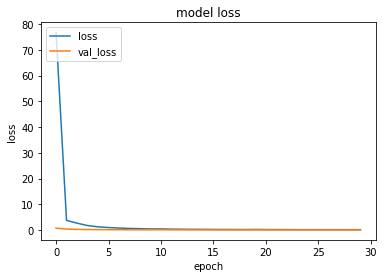

In [26]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
    plt.legend(['loss', 'val_loss'], loc='upper left')

plot_hist(hist)

# 3. Predition and Recommendation

In [27]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[0.00000000e+00, 5.53160906e-04, 0.00000000e+00, ...,
        6.71893358e-04, 6.54667616e-04, 7.17610121e-04],
       [3.56137753e-05, 0.00000000e+00, 3.57627869e-07, ...,
        6.85453415e-07, 2.98023224e-07, 5.96046448e-08],
       [1.86175108e-03, 2.58982182e-05, 7.96318054e-05, ...,
        2.93850899e-05, 2.91466713e-05, 2.26497650e-06],
       ...,
       [6.33373857e-03, 3.16977501e-04, 2.22265720e-04, ...,
        2.16573477e-04, 1.10122561e-03, 2.13325024e-04],
       [1.64353848e-03, 5.00679016e-05, 6.89625740e-05, ...,
        8.97347927e-05, 5.11407852e-05, 1.41859055e-05],
       [7.72456527e-02, 5.25971949e-02, 2.14180648e-02, ...,
        1.84481740e-02, 1.58501863e-02, 2.74384916e-02]], dtype=float32)

In [28]:
# converting the reconstructed matrix back to a Pandas dataframe
df_pred_matrix  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns[:n], 
                               index   = df_matrix.index[:n])
df_pred_matrix.head()

,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,0.000000,0.000553,0.000000e+00,0.000495,0.000627,0.000168,0.005387,7.367134e-04,0.009683,3.882945e-04,0.0,0.000000,0.007407,0.000000,6.031096e-04,0.000000,7.279515e-04,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.313256e-04,0.000574,1.222759e-03,0.00000,4.929602e-04,2.500117e-04,5.332232e-04,0.001071,0.001666,0.001957,0.005132,0.005453,3.058314e-04,0.001324,1.304150e-04,4.365742e-04,...,1.241416e-03,0.000000,2.540946e-04,0.000000,2.172589e-04,0.003983,1.440644e-04,1.660585e-04,0.003379,3.882051e-04,0.002016,6.680489e-04,0.000690,0.000000,0.002001,0.000000,0.010190,3.358424e-04,0.009227,0.005237,0.001244,0.003533,0.000000,4.087090e-04,5.331635e-04,6.082654e-04,4.204810e-04,0.001955,3.203154e-04,1.831681e-03,0.002797,0.000679,0.022445,0.002899,0.004809,1.836121e-04,3.743470e-04,6.718934e-04,6.546676e-04,7.176101e-04
1,0.000036,0.000000,3.576279e-07,0.000000,0.000002,0.000000,0.000015,8.344650e-07,0.000162,3.576279e-07,0.0,0.000000,0.000362,0.000000,4.768372e-07,0.000000,7.152557e-07,0.000000,0.0,0.0,0.000218,0.0,0.0,0.0,1.192093e-07,0.000002,7.748604e-07,0.00000,4.768372e-07,2.086163e-07,1.490116e-07,0.000002,0.000008,0.000040,0.000004,0.000003,2.980232e-07,0.000001,8.940697e-08,8.940697e-08,...,2.980232e-07,0.000000,3.278255e-07,0.001592,2.384186e-07,0.000028,2.384186e-07,1.788139e-07,0.000015,6.854534e-07,0.000010,4.172325e-07,0.000001,0.001684,0.000021,0.000001,0.000049,1.788139e-07,0.000613,0.000052,0.000001,0.000000,0.000001,1.490116e-07,2.384186e-07,5.960464e-07,2.384186e-07,0.000008,2.980232e-08,4.768372e-07,0.000007,0.000001,0.000092,0.000049,0.000000,5.960464e-08,1.788139e-07,6.854534e-07,2.980232e-07,5.960464e-08
2,0.001862,0.000026,7.963181e-05,0.000003,0.000592,0.000002,0.000186,1.972020e-04,0.003715,2.288818e-05,0.0,0.046257,0.004617,0.000066,5.495548e-05,0.000000,2.861023e-05,0.000000,0.0,0.0,0.001008,0.0,0.0,0.0,1.543760e-05,0.000000,3.343821e-05,0.00000,3.695488e-05,5.245209e-06,5.394220e-06,0.000021,0.000079,0.001157,0.000000,0.000556,1.010299e-05,0.000076,8.344650e-07,6.377697e-06,...,1.648068e-05,0.017073,1.561642e-05,0.000000,3.176928e-05,0.000000,2.351403e-05,1.734495e-05,0.000000,6.499887e-05,0.000075,8.267164e-05,0.000000,0.014311,0.000557,0.000087,0.000155,1.466274e-05,0.002131,0.001975,0.000062,0.007144,0.000135,1.949072e-05,1.472235e-05,5.447865e-05,2.154708e-05,0.000140,9.030104e-06,5.695224e-05,0.001340,0.000046,0.000994,0.000210,0.000106,6.556511e-06,1.227856e-05,2.938509e-05,2.914667e-05,2.264977e-06
3,0.000668,0.000370,3.414154e-04,0.000030,0.000348,0.000171,0.001697,1.569182e-03,0.002788,2.608299e-04,0.0,0.000000,0.005547,0.000000,1.371771e-03,0.014807,1.030266e-04,0.018307,0.0,0.0,0.000000,0.0,0.0,0.0,3.936887e-05,0.002399,1.005530e-04,0.01169,8.219481e-05,6.320775e-04,3.844500e-05,0.001061,0.001966,0.003690,0.000063,0.000287,6.762147e-05,0.000244,7.638335e-05,3.761053e-05,...,2.128184e-04,0.000000,5.504489e-05,0.000000,6.726384e-05,0.003727,4.940331e-04,2.115369e-04,0.001952,4.941821e-04,0.001061,3.841817e-04,0.000730,0.011756,0.000519,0.000032,0.008717,3.850460e-05,0.006952,0.008883,0.000066,0.000000,0.000149,1.490116e-04,1.048446e-04,1.724660e-04,6.487370e-04,0.000762,3.361702e-05,1.649857e-04,0.004385,0.000429,0.002948,0.002956,0.000184,1.788139e-05,1.363158e-04,2.101064e-04,6.464124e-05,9.250641e-05
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.002176,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.019008,0.000000,0.000000e+00,0.000000,1.046240e-02,0.000000,0.0,0.0,0.026576,0.0,0.0,0.0,7.974923e-03,0.007419,2.376914e-03,0.00000,1.761824e-02,0.000000e+00,2.136081e-03,0.000000,0.000000,0.034507,0.000000,0.008870

In [0]:
def recommendor(user_id, df_matrix, df_pred_matrix, df_games = df_games, topn = 5):
	#Get general scores
	pred_scores = df_pred_matrix.loc[user_id].values #get the user column
	df_scores_all = pd.DataFrame({'score': pred_scores},index = df_matrix.columns.astype(	int))

	#First tell user history
	played = df_scores_all[df_scores_all['score'] == 0].index
	df_played_game = df_games.reindex(played)
	df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values},index = 	df_matrix.columns.astype(int))
	df_played_time = df_playtime.reindex(played)
	df_history = pd.merge(df_played_time, df_played_game, left_index=True, 	right_index=True).sort_values('time', ascending=False)
	df_history.index.name = 'game_id'
	print('User played:')
	print(print(df_history.head(10).to_string()))
	
	#Then results
	df_scores_unplayed = df_scores_all[df_scores_all['score'] != 0]  #get rid of played games
	topn = min(len(df_scores_unplayed.index),topn) 
	df_recommend = pd.merge(df_scores_unplayed, df_games.reindex(df_scores_unplayed.index), 	left_index=True, right_index=True)
	df_recommend.index.name = 'game_id'
	print('We recommend:')
	print(df_recommend.sort_values('score', ascending=False).head(topn).to_string())
    
	return 

In [31]:
recommendor(user_id = 0, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                               name                   genres                                          publisher                     developer  price
game_id                                                                                                                                                           
730      23532   Counter-Strike: Global Offensive               ['Action']                                              Valve                         Valve  14.99
8930     10345        Sid Meier's Civilization® V             ['Strategy']                   Firaxis Games,Aspyr (Mac, Linux)  2K Games, Aspyr (Mac, Linux)  29.99
1250     10006                      Killing Floor               ['Action']                               Tripwire Interactive          Tripwire Interactive  19.99
300       4733              Day of Defeat: Source               ['Action']                                              Valve                         Valve   9.99
3590     

In [32]:
recommendor(user_id = 10000, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                                      name                   genres          publisher                                 developer  price
game_id                                                                                                                                              
730      39615          Counter-Strike: Global Offensive               ['Action']              Valve                                     Valve  14.99
4000      5123                               Garry's Mod  ['Indie', 'Simulation']  Facepunch Studios                                     Valve   9.99
550       1215                             Left 4 Dead 2               ['Action']              Valve                                     Valve  19.99
620        710                                  Portal 2  ['Action', 'Adventure']              Valve                                     Valve  19.99
6060       118  Star Wars: Battlefront 2 (Classic, 2005)               ['Action']   Pan